In [1]:
import sqlite3

import pandas as pd

from decideanalyses import settings
from decideanalyses.helpers import get_all_actors
%matplotlib inline

database_connection = sqlite3.connect(settings.DATABASE_URL)
model_run_ids = settings.MODEL_RUN_IDS
model_run_id_param = ','.join(model_run_ids)

In [2]:
actors = get_all_actors(database_connection, model_run_ids)

# for actor, actor_id in actors:

sql = """SELECT COUNT(*)   exchanges_count,
       SUM(ea.eu) utility_sum,
       AVG(ea.eu)        utility_avg,
       a.name as         actor,
       m.p
FROM exchangeactor ea
         JOIN actor a on ea.actor_id = a.id
         JOIN exchange e on ea.id = e.i_id
         JOIN iteration i on e.iteration_id = i.id
         JOIN repetition r on i.repetition_id = r.id
         JOIN modelrun m on r.model_run_id = m.id
WHERE m.id in (%s)
GROUP BY a.id, m.p;""" % model_run_id_param

df = pd.read_sql_query(
    sql=sql,
    con=database_connection,    
    index_col=['actor', 'p'],
)
    

In [3]:
df_exchanges_count = pd.pivot_table(df, index=['p'], columns=['actor'], values=['exchanges_count'])
df_exchanges_count

exchanges_count                                                        \
actor          AILAC2 ALBA AOSIS African_grp Arab_statess Brazil China  EIG   
p                                                                             
0.0               223  122   113         188          175    193   161  142   
0.8               259  125   131         183          184    187   163  148   

                                                          
actor EU28 India Japan LDCs_BGD Russia  USA Umbrella_min  
p                                                         
0.0    204    74   138      190    276  302          114  
0.8    206    85   154      181    278  313          123

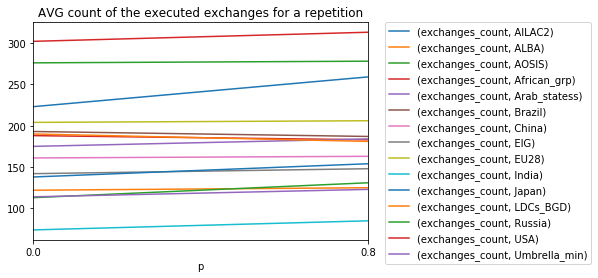

In [4]:
plt = df_exchanges_count.plot() #.bar()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('AVG count of the executed exchanges for a repetition')
plt.set_xticks(df_exchanges_count.index)
plt

In [5]:
pd_utility_sum = pd.pivot_table(df, index=['p'], columns=['actor'], values=['utility_sum'])
pd_utility_sum

utility_sum                                                           \
actor      AILAC2      ALBA      AOSIS African_grp Arab_statess     Brazil   
p                                                                            
0.0     26.949199  3.957685  16.421374   16.779302    25.926701  32.882101   
0.8     28.323280  4.425726  18.662670   17.387429    26.373442  34.110363   

                                                                        \
actor      China        EIG       EU28     India      Japan   LDCs_BGD   
p                                                                        
0.0    35.573055  13.814053  40.779177  4.843883  21.524646  24.523031   
0.8    35.296631  14.926149  39.990265  7.219604  23.143260  24.702406   

                                          
actor     Russia        USA Umbrella_min  
p                                         
0.0    51.882422  80.506565    10.359596  
0.8    58.618052  97.419067    13.040676

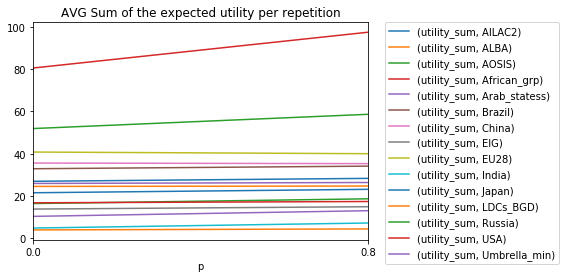

In [6]:
plt = pd_utility_sum.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('AVG Sum of the expected utility per repetition')
plt.set_xticks(pd_utility_sum.index)
plt

In [7]:
pd_utility_avg = pd.pivot_table(df, index=['p'], columns=['actor'], values=['utility_avg'])
pd_utility_avg



utility_avg                                                         \
actor      AILAC2      ALBA     AOSIS African_grp Arab_statess    Brazil   
p                                                                          
0.0      0.120848  0.032440  0.145322    0.089252     0.148153  0.170374   
0.8      0.109356  0.035406  0.142463    0.095013     0.143334  0.182408   

                                                                             \
actor     China       EIG      EU28     India     Japan  LDCs_BGD    Russia   
p                                                                             
0.0    0.220951  0.097282  0.199898  0.065458  0.155976  0.129069  0.187980   
0.8    0.216544  0.100852  0.194128  0.084937  0.150281  0.136477  0.210856   

                              
actor       USA Umbrella_min  
p                             
0.0    0.266578     0.090874  
0.8    0.311243     0.106022

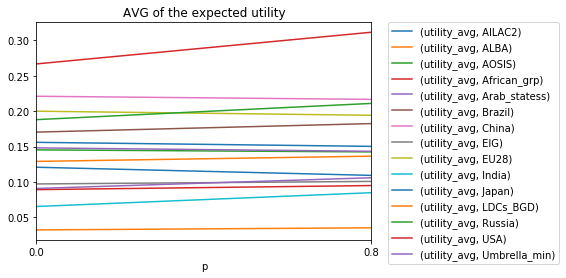

In [8]:
plt = pd_utility_avg.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('AVG of the expected utility')
plt.set_xticks(pd_utility_avg.index)
plt